In [50]:
# Importación de Librerías
!pip install sympy
import numpy as np
import math
import cvxpy as cp
import sympy as sp
from sympy import Integral, Matrix, pprint, solve
import warnings
warnings.filterwarnings("ignore")
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm

Funciones de gradiente descendiente:


In [46]:
def descent_grad_optim_step(x, f, grad, epsi, max_iter):  
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  for i in range(max_iter):
    g = grad(*x)
    def phi(s):

      params=x-s*g.T
      params=params[0,:]  # Cambiar a una sola matriz
      #return f(x[0]-s*g[0],x[1]-s*g[1],x[2]-s*g[2])
      return f(*params)

    alpha = optimize.fminbound(phi, 0, 10)
  
    x = x - alpha * g.T
    x=x[0,:]
    xs[i+1,:] = x
    tol = np.linalg.norm(g)
    if tol < epsi:
      
     break
  return xs,i+1

In [47]:
def descent_grad_fixed_step(x, grad, a, max_iter, epsi): 
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  
  for i in range(max_iter):
      g=grad(*x)
      x = x - a * g.T
      x=x[0,:]
      xs[i+1,:] = x
      tol = np.linalg.norm(grad(*x))
      if tol < epsi:
       break
  return xs,i+1

Funciones de Gradiente y Hessiano:

In [48]:
def gradient(f,*variables):
  n=len(variables)
  m=1
  grad=sp.zeros(n,m)
  i=0
  for var in variables:
    grad[i,0]=sp.diff(f,var)
    i+=1
  return grad
def hessian(f,*variables):
  n=len(variables)
  m=n
  hess=sp.zeros(n,m)
  for i in range(0,n):
   for j in range(0,n):
  
    first_diff=sp.diff(f,variables[j])
    second_diff=sp.diff(first_diff,variables[i])
    hess[i,j]=second_diff  
  return hess

## Problema 1

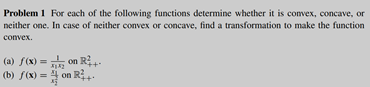

### Solución (a)

La matriz Hessiana es:


⎡  2         1   ⎤
⎢──────   ───────⎥
⎢  3        2   2⎥
⎢x₁ ⋅x₂   x₁ ⋅x₂ ⎥
⎢                ⎥
⎢   1       2    ⎥
⎢───────  ────── ⎥
⎢  2   2       3 ⎥
⎣x₁ ⋅x₂   x₁⋅x₂  ⎦



Los valores propios de la matriz son: 



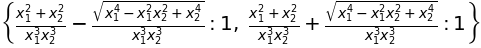

In [51]:
# Definimos la función
x1 = sp.Symbol('x_1')
x2 = sp.Symbol('x_2')
f = 1/(x1*x2) 

# Cálculo del Hessiano
hess = hessian(f,x1,x2)
hess_val = sp.lambdify([x1,x2],hess)

sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("\n")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()

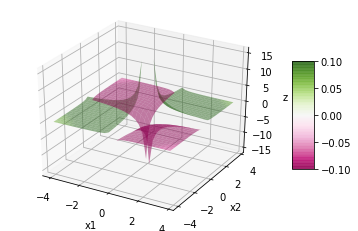

In [57]:
# Gráfica de la función con sus líneas de contorno 
xmax = 4
delta = 0.25
XX = np.arange(-xmax, xmax, delta)
YY = np.arange(-xmax, xmax, delta)
X, Y = np.meshgrid(XX, YY)

F = sp.lambdify([x1,x2],f)
Z = F(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.PiYG, alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

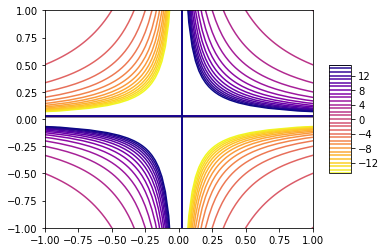

In [58]:
xmax = 4
delta = 0.025
XX = np.arange(-xmax, xmax, delta)
YY = np.arange(-xmax, xmax, delta)
X, Y = np.meshgrid(XX, YY)
F = sp.lambdify([x1,x2],f)
Z = F(X,Y)

contour_levels=np.arange(15,-16,-1.0)
contour = plt.contour(X, Y,Z,np.flip(contour_levels),cmap=cm.plasma_r)

plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.colorbar(contour, shrink=0.5, aspect=5)

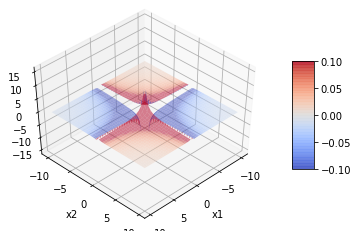

In [62]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx= 1/(x1*x2) 
grad=gradient(fx,x1,x2)
hess=hessian(fx,x1,x2)
grad_val=sp.lambdify([x1,x2],grad)
hess_val=sp.lambdify([x1,x2],hess)
sp.init_printing()
hess.eigenvals()

from mpl_toolkits.mplot3d import Axes3D  
from random import random, seed
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#print(x1_vals,x2_vals,z)
#print(xmin)

xmax=10
dx=0.25
XX = np.arange(-xmax, xmax, dx)
YY= np.arange(-xmax, xmax, dx)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

Análisis en cada sección:

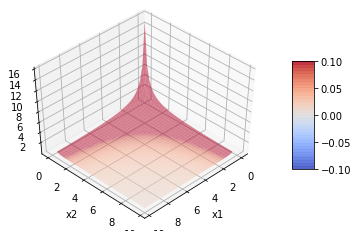

In [59]:
xmax=10
dx=0.25
XX = np.arange(0, xmax, dx)
YY= np.arange(0, xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

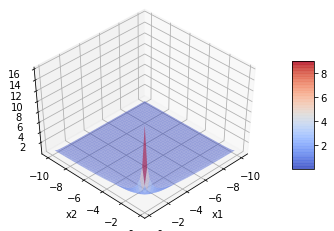

In [60]:
xmax=10
dx=0.25
XX = np.arange(-xmax,0, dx)
YY= np.arange(-xmax, 0, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


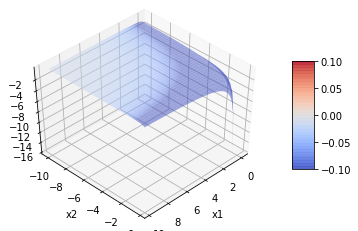

In [11]:
xmax=10
dx=0.25
XX = np.arange(0,xmax, dx)
YY= np.arange(-xmax, 0, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


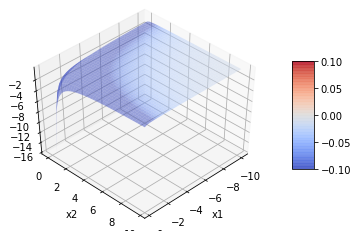

In [12]:
xmax=10
dx=0.25
XX = np.arange(-xmax, 0, dx)
YY= np.arange(0,xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

### Solución (b)

La matriz Hessiana es:


⎡     -2  ⎤
⎢ 0   ─── ⎥
⎢       3 ⎥
⎢     x₂  ⎥
⎢         ⎥
⎢-2   6⋅x₁⎥
⎢───  ────⎥
⎢  3    4 ⎥
⎣x₂   x₂  ⎦



Los valores propios de la matriz son: 



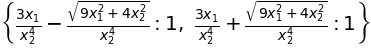

In [63]:
x1 = sp.Symbol('x_1')
x2 = sp.Symbol('x_2')
f = x1/(x2**2) 

# Cálculo el Hessiano
hess = hessian(f,x1,x2)
hess_val = sp.lambdify([x1,x2],hess)

sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("\n")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()

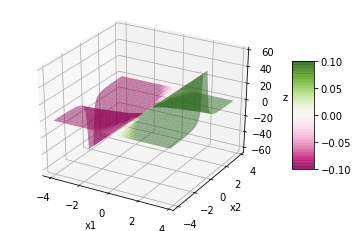

In [69]:
#Gráfico de la función con sus líneas de contorno 
xmax = 4
delta = 0.25
XX = np.arange(-xmax, xmax, delta)
YY = np.arange(-xmax, xmax, delta)
X, Y = np.meshgrid(XX, YY)

F = sp.lambdify([x1,x2],f)
Z = F(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.PiYG, alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

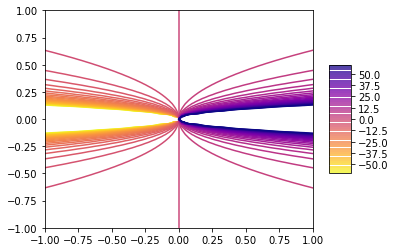

In [70]:
xmax = 4
delta = 0.025
XX = np.arange(-xmax, xmax, delta)
YY = np.arange(-xmax, xmax, delta)
X, Y = np.meshgrid(XX, YY)
F = sp.lambdify([x1,x2],f)
Z = F(X,Y)
contour_levels=np.arange(60,-61,-2.5)
contour = plt.contour(X, Y,Z,np.flip(contour_levels),cmap=cm.plasma_r)
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.colorbar(contour, shrink=0.5, aspect=5)

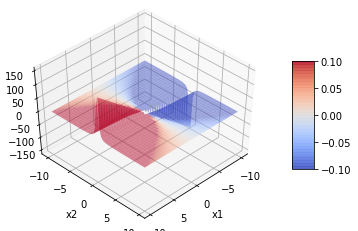

In [67]:
#printing
from mpl_toolkits.mplot3d import Axes3D  
from random import random, seed
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=x1/(x2**2) 
grad=gradient(fx,x1,x2)
hess=hessian(fx,x1,x2)
grad_val=sp.lambdify([x1,x2],grad)
hess_val=sp.lambdify([x1,x2],hess)
sp.init_printing()
hess.eigenvals()
#print(x1_vals,x2_vals,z)
#print(xmin)

xmax=10
dx=0.25
XX = np.arange(-xmax, xmax, dx)
YY= np.arange(-xmax, xmax, dx)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

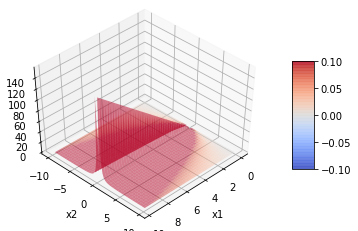

In [68]:
xmax=10
dx=0.25
XX = np.arange(0, xmax, dx)
YY= np.arange(-xmax,xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


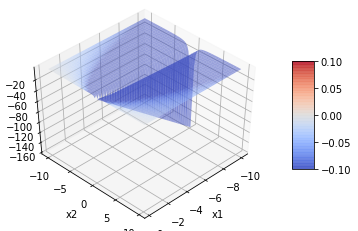

In [16]:
xmax=10
dx=0.25
XX = np.arange(-xmax, 0, dx)
YY= np.arange(-xmax,xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

## Problema 2

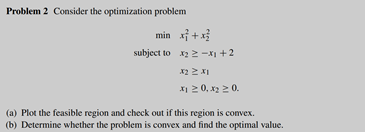

### Solución (a)

In [71]:
# Definición de la función con las restricciones
x1 = sp.Symbol('x_1')
x2 = sp.Symbol('x_2')
f = x1**2+x2**2
subject1 = x1+x2-2  # restricción: >=0
subject2 = x2-x1    # restricción: >=0)

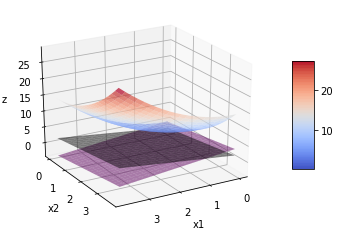

In [84]:
# Gráfica de la función con las restricciones
delta = 0.2
XX = np.arange(0, 4, delta) # Se asegura la condición x1>=0
YY = np.arange(0, 4, delta) # Se asegura la condición x2>=0
X, Y = np.meshgrid(XX, YY)

F = sp.lambdify([x1,x2],f)
Z = F(X,Y)
R1=sp.lambdify([x1,x2],subject1)
Z1=R1(X,Y)
R2=sp.lambdify([x1,x2],subject2)
Z2=R2(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.7)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.plot_surface(X, Y, Z1, color='black',alpha=0.5)
ax.plot_surface(X, Y, Z2, color='purple',alpha=0.5)

ax.view_init(25,60)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

Text(0, 0.5, '$y$')

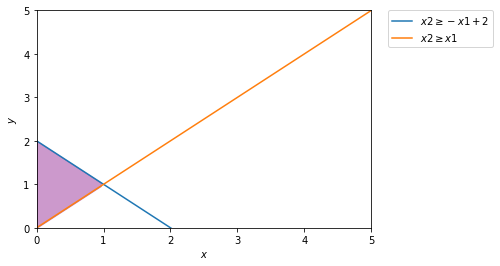

In [87]:
# Gráfica de la región factible
x = np.linspace(0, 5, 100)
y1 = 2 - x
y2 = x
plt.plot(x, y1, label=r'$x2\geq -x1+2$')
plt.plot(x, y2, label=r'$x2\geq x1$')
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.fill_between(x, y1, y2, where = (y1>y2), color='purple', alpha=0.4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

De acuerdo con la anterior gráfica, podemos concluir que la región factible si es Convexa, ya que al trazar un segmento de línea que conecta dos puntos factibles cualesquiera, sucede que pasa solo por otros factibles puntos, mas no por aquellos que no se encuntran dentro del conjunto que es factible.



### Solución (b) / Optimización

In [88]:
# Para determinar si el problema es o no convexo, vamos a calcular la matriz Hessiana de la función
hess = hessian(f,x1,x2)
hess_val = sp.lambdify([x1,x2],hess)
sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("\n")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()

La matriz Hessiana es:


⎡2  0⎤
⎢    ⎥
⎣0  2⎦



Los valores propios de la matriz son: 



Se puede observar, que tanto la matriz hessiana como sus valores propios son positivos, por lo que podemos afirmar que la función en cuestión es Convexa.

In [94]:
x1=cp.Variable(1)
x2=cp.Variable(1)
cost=x1**2+x2**2
prob = cp.Problem(cp.Minimize(cost),
                  [x2>=-x1+2,
                  x2>=x1,
                  x2>=0,
                  x1>=0]
                  )
prob.solve()
print("The optimal value is", prob.value)
print("A solution x is")
print(f"x1 = {x1.value} , x2 = {x2.value}")

The optimal value is 2.000000000000001
A solution x is
x1 = [1.] , x2 = [1.]


## Problema 3

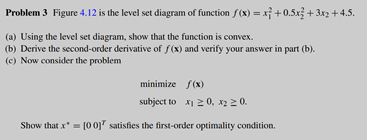

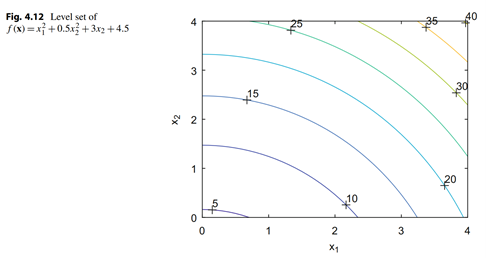

### Solución (a)

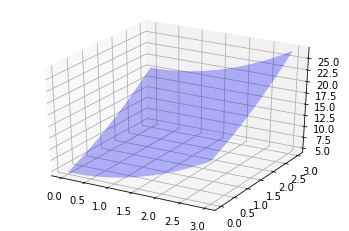

In [24]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=x1**2+0.5*x2**2+3*x2+4.5
dx=0.01
xmax=3
xmin=0
XX = np.arange(xmin, xmax, dx)#x1>=0
YY= np.arange(xmin, xmax, dx)#x2>=0

X, Y = np.meshgrid(XX, YY)

F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, color='blue',alpha=0.3)

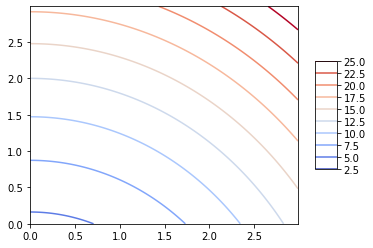

In [23]:
contour_levels=np.arange(25,0,-2.5)
#contour = plt.contour(X, Y,Z,np.flip(contour_levels))
contour = plt.contour(X, Y,Z,np.flip(contour_levels),cmap=cm.coolwarm)
plt.colorbar(contour, shrink=0.5, aspect=5)

### Solución (b)

In [26]:
hess=hessian(fx,x1,x2)
print('Criterio de la segunda derivada :\n',hess)
valores_propios=hess.eigenvals()
print('Los valores propios son: ',valores_propios,'...es decir 2 y 1')
print('Al ser ambos positivos, nos encontramos con una función con mínimo')

Criterio de la segunda derivada :
 Matrix([[2, 0], [0, 1.00000000000000]])
Los valores propios son:  {2: 1, 1.00000000000000: 1} ...es decir 2 y 1
Al ser ambos positivos, nos encontramos con una función con mínimo


In [91]:
# Para determinar si el problema es o no Convexo, se calcula la matriz Hessiana de la función
x1 = sp.Symbol('x_1')
x2 = sp.Symbol('x_2')
f = x1**2+0.5*x2**2+3*x2+4.5
hess = hessian(f,x1,x2)
hess_val = sp.lambdify([x1,x2],hess)

sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("\n")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()

La matriz Hessiana es:


⎡2   0 ⎤
⎢      ⎥
⎣0  1.0⎦



Los valores propios de la matriz son: 



Se puede observar, que tanto la matriz hessiana como sus valores propios son positivos, por lo que podemos afirmar que la función en cuestión es Convexa.

### Solución (c) / Optimización

In [27]:
n=1
x1=cp.Variable(1)
x2=cp.Variable(1)
cost=x1**2+0.5*x2**2+3*x2+4.5
prob = cp.Problem(cp.Minimize(cost),
                  [x2>=0,
                   x1>=0]       
)
prob.solve()

print("\nThe optimal value is", prob.value)
print("A solution x is")
print(f"x1= {x1.value},x2={x2.value}")


The optimal value is 4.5
A solution x is
x1= [0.],x2=[2.96289305e-25]


In [93]:
# Para ver si el punto x = [0 0]T satisface la condición necesaria de primer orden encontramos el gradiente de la función
grad=gradient(f,x1,x2)
display(Matrix(grad))

⎡   2⋅x₁   ⎤
⎢          ⎥
⎣1.0⋅x₂ + 3⎦

Evaluando en el punto $x* = \begin{pmatrix}
  0 \\
  0 \\
   \end{pmatrix}$ , se tiene que $\bigtriangledown f(x*) = \begin{pmatrix}
  0 \\
  3 \\
   \end{pmatrix}$

   $d^T \bigtriangledown f(x*) = 0d_1 + 3d_2 $

   
Como $x*$ es un punto límite, y cualquier dirección factible en este punto tiene la forma $ d = \begin{pmatrix}
  d_1 \\
  d_2 \\
   \end{pmatrix},$ $d_1 >0, d_2 >0.$ 

Por lo tanto,   $d^T \bigtriangledown f(x*) $ siempre será $>=0$, que significa que $x*$ satisface la condición necesaria de primer orden.

## Problema 4

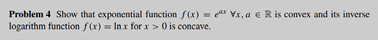

Convex function


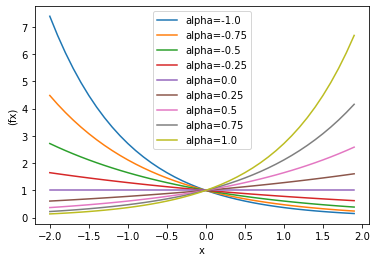

In [28]:
# Graficar f(x) = e^ax
dalpha=0.25
alpha=np.arange(-1,1+dalpha,dalpha)
x=np.arange(-2,2,0.1)
for a in alpha:
  y=np.exp(x*a)
  plt.plot(x,y,label=f'alpha={a}')
  #print(y)
plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
print('Convex function')

De acuerdo con la anterior gráfica se puede deducir que $f(x) = e^{xa}$ es Convexa para todos auquellos valores reales de $ \alpha$



Función Cóncava


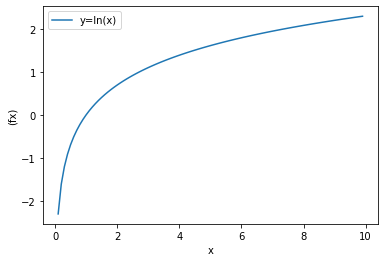

In [30]:
# Graficar f(x) = lnx, x>0
x=np.arange(0.1,10,0.1)
y=np.log(x)
plt.plot(x,y,label=f'y=ln(x)')
  #print(y)
plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
print('Función Cóncava')

## Problema 5

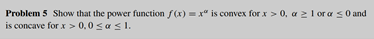

Función Convexa


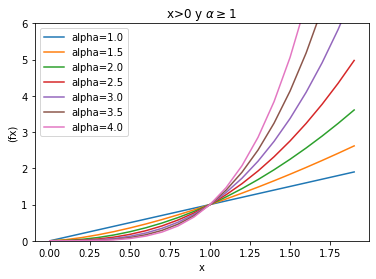

In [31]:
dalpha=0.5
alpha=np.arange(1,4+dalpha,dalpha)
x=np.arange(0,2,0.1)
for a in alpha:
  y=x**a
  plt.plot(x,y,label=f'alpha={a}')
  #print(y)
plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
plt.ylim(0,6)
plt.title(r'x>0 y $\alpha \geq$1 ')
print('Función Convexa')

De acuerdo con la anterior gráfica se puede deducir que la función $f(x) = x^a$, con $x>0$ y $\alpha \geq$1 es Convexa.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in reciprocal
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


Función Convexa


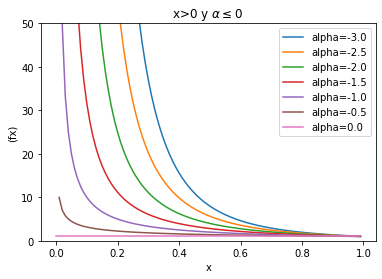

In [32]:
dalpha=0.5
alpha=np.arange(-3,0+dalpha,dalpha)
x=np.arange(0,1,0.01)
for a in alpha:
  y=x**a
  plt.plot(x,y,label=f'alpha={a}')
  #print(y)
plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
plt.ylim(0, 50)
plt.title(r'x>0 y $\alpha \leq$0 ')
print('Función Convexa')

De la gráfica podemos deducir que la función $f(x) = x^a$, con  $x>0$ y $\alpha \leq$0 también es Convexa.



Función Concava


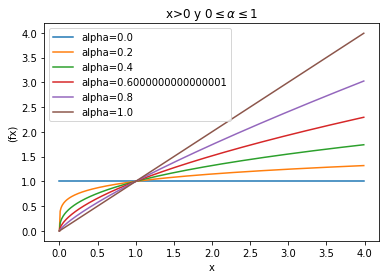

In [34]:
dalpha=0.2
alpha=np.arange(0,1+dalpha,dalpha)
x=np.arange(0,4,0.01)
for a in alpha:
  y=x**a
  plt.plot(x,y,label=f'alpha={a}')
  #print(y)
plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
plt.title(r'x>0 y $0 \leq \alpha \leq$1')
print('Función Concava')

De acuerdo con la anterior gráfica se puede deducir que la función $f(x) = x^a$ con $x>0$ y $0 \leq \alpha \leq$1 es Cóncava.

